In [480]:
import pandas as pd
import numpy as np

In [481]:
df=pd.read_csv(r"C:\Imp\SamanyuK\Datasets\drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


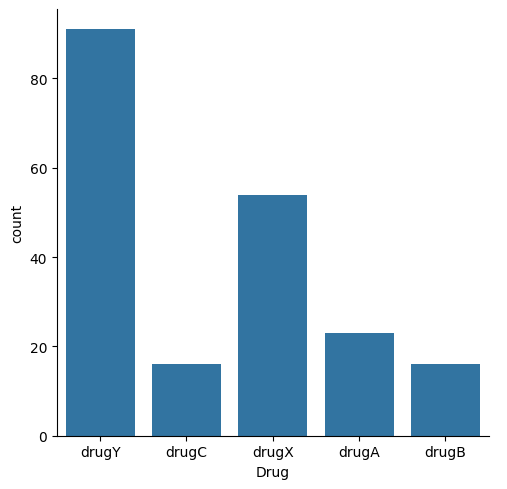

In [483]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(df,x='Drug',kind='count')

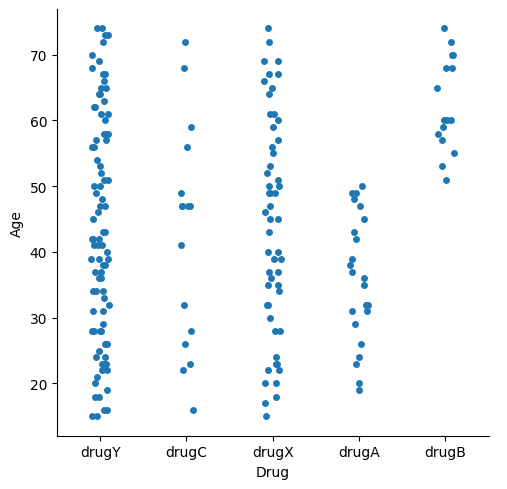

In [484]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(df,x='Drug',y='Age')

In [485]:
print(df['Sex'].value_counts())

Sex
M    104
F     96
Name: count, dtype: int64


In [486]:
df['Sex']=df['Sex'].apply(lambda x: 1 if x=='M' else 0)

In [487]:
print(df['BP'].value_counts())

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64


In [488]:
tdf=pd.get_dummies(df['BP'],prefix='BP')
df=pd.concat([df,tdf],axis=1)

In [489]:
print(df['Cholesterol'].value_counts())

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64


In [490]:
tdf=pd.get_dummies(df['Cholesterol'],prefix='Cholestrol')
df=pd.concat([df,tdf],axis=1)

In [491]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,BP_HIGH,BP_LOW,BP_NORMAL,Cholestrol_HIGH,Cholestrol_NORMAL
0,23,0,HIGH,HIGH,25.355,drugY,True,False,False,True,False
1,47,1,LOW,HIGH,13.093,drugC,False,True,False,True,False
2,47,1,LOW,HIGH,10.114,drugC,False,True,False,True,False
3,28,0,NORMAL,HIGH,7.798,drugX,False,False,True,True,False
4,61,0,LOW,HIGH,18.043,drugY,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
195,56,0,LOW,HIGH,11.567,drugC,False,True,False,True,False
196,16,1,LOW,HIGH,12.006,drugC,False,True,False,True,False
197,52,1,NORMAL,HIGH,9.894,drugX,False,False,True,True,False
198,23,1,NORMAL,NORMAL,14.020,drugX,False,False,True,False,True


In [492]:
df.drop(columns=['BP','Cholesterol'],axis=1,inplace=True)

In [493]:
print(df['Drug'].value_counts())

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


In [494]:
df

,Age,Sex,Na_to_K,Drug,BP_HIGH,BP_LOW,BP_NORMAL,Cholestrol_HIGH,Cholestrol_NORMAL
0,23,0,25.355,drugY,True,False,False,True,False
1,47,1,13.093,drugC,False,True,False,True,False
2,47,1,10.114,drugC,False,True,False,True,False
3,28,0,7.798,drugX,False,False,True,True,False
4,61,0,18.043,drugY,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...
195,56,0,11.567,drugC,False,True,False,True,False
196,16,1,12.006,drugC,False,True,False,True,False
197,52,1,9.894,drugX,False,False,True,True,False
198,23,1,14.020,drugX,False,False,True,False,True


In [495]:
df[['BP_HIGH', 'BP_LOW', 'BP_NORMAL', 'Cholestrol_HIGH', 'Cholestrol_NORMAL']]=df[['BP_HIGH', 'BP_LOW', 'BP_NORMAL', 'Cholestrol_HIGH', 'Cholestrol_NORMAL']].astype(int)

In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                200 non-null    int64  
 1   Sex                200 non-null    int64  
 2   Na_to_K            200 non-null    float64
 3   Drug               200 non-null    object 
 4   BP_HIGH            200 non-null    int32  
 5   BP_LOW             200 non-null    int32  
 6   BP_NORMAL          200 non-null    int32  
 7   Cholestrol_HIGH    200 non-null    int32  
 8   Cholestrol_NORMAL  200 non-null    int32  
dtypes: float64(1), int32(5), int64(2), object(1)
memory usage: 10.3+ KB


In [497]:
from sklearn.model_selection import train_test_split
x=df.drop(columns='Drug')
y=df['Drug']
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20)

In [498]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [499]:
dt=DecisionTreeClassifier()
path=dt.cost_complexity_pruning_path(x_t,y_t)
alphas=path.ccp_alphas
print(alphas)
param={'ccp_alpha':alphas}
ndt=GridSearchCV(dt,param_grid=param,scoring='accuracy',cv=10)
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
bestalpha=ndt.best_params_['ccp_alpha']

[0.         0.05333333 0.10236559 0.15113235 0.33112428]
{'ccp_alpha': 0.0}
0.9866666666666667


In [500]:
param={'criterion':['gini','entropy'],
        'max_depth':list(np.arange(2,12)),
    'min_samples_split':list(np.arange(2,12)),
   'min_samples_leaf':list(np.arange(2,12)),
       'max_features':['auto','sqrt','log2']}
dt=DecisionTreeClassifier(ccp_alpha=bestalpha)
ndt=GridSearchCV(dt,param_grid=param,scoring='accuracy',cv=10)
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
ndt=ndt.best_estimator_

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}
0.9933333333333334


C:\Users\Samanyu K\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20000 fits failed out of a total of 60000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Samanyu K\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Samanyu K\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Samanyu K\AppData\Local\Programs\Python\Python312\Lib\site

In [502]:
pred=ndt.predict(x_te)

In [509]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
cr=classification_report(y_te,pred)
a=accuracy_score(y_te,pred)
cm=confusion_matrix(y_te,pred)
print(cr,a,'\n',cm)

              precision    recall  f1-score   support

       drugA       0.75      0.50      0.60         6
       drugB       0.25      0.50      0.33         2
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        14
       drugY       1.00      1.00      1.00        22

    accuracy                           0.92        50
   macro avg       0.80      0.80      0.79        50
weighted avg       0.94      0.92      0.93        50
 0.92 
 [[ 3  3  0  0  0]
 [ 1  1  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 14  0]
 [ 0  0  0  0 22]]


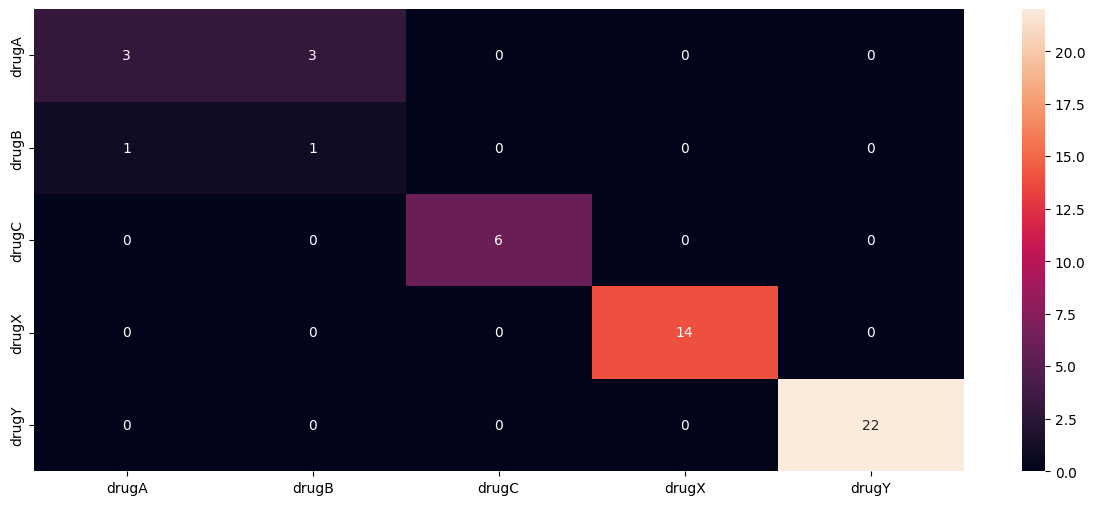

In [510]:
labels=['drugA','drugB','drugC','drugX','drugY']
plt.figure(figsize=(15,6))
plt.xlabel('Reality')
plt.ylabel('Predicted')
sns.heatmap(cm,annot=True,xticklabels=labels,
    yticklabels=labels)
plt.show()